# Visualization of Food Delivery Transactions
### Francis Zhan, McKayla Muller, Joangie Chloe

### Introduction
One industry leveraging the immense potential of big data is the food delivery industry. In the past, most of food delivery was done on a per-restaurant basis, with each store recruiting their own delivery personnel. Additionally, the delivery routes were often inefficient, decided by each delivery person's experience rather than data. Today, huge amounts of delivery startups like GrubHub and UberEats are popping up, leveraging the power of data in optimizing food delivery across multiple restaurants. This project will analyze data points of deliveries as well as restaurant information to generate insight, like popularity of food delivery based on geography, demographic, or time of day.

### Data
The data we are going to analyze first comes from a Chinese Takeout Restaurant in Charleston, SC. This data originates from  https://www.kaggle.com/dustincm/chinese-delivery-drive. Takeout transactions are a huge part of American culture today, and we believe that, through analyzing these transactions, we can find meaningful insight that lends itself to the delivery industry as a whole.

A secondary supportive data set we used was a GIS data set, so we can use it to map street addresses to locations in Charleston, SC. This was mainly used to explore density and location of orders visually, as seen later.

In [21]:
#all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy 
from scipy import stats
import geopy
from geopy.geocoders import Nominatim

food = pd.read_csv("Chopsticks_Data_Clean.csv", encoding = "ISO-8859-1")

In [3]:
food.head()

,Unnamed: 0,Street_Address,Date,Tip,Phone_Number,Race,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles
0,0,23 Kracke,7/5/2016,3.00,8.438056e+09,W,F,R,19.83,R,11:58,NaN,Y,NaN,2.5
1,1,145 Bee,6/29/2016,4.78,9.149805e+09,W,F,NaN,NaN,NaN,15:06,NaN,Y,NaN,1.6
2,2,Ashley River,7/7/2016,NaN,8.435063e+09,NaN,NaN,NaN,12.93,C,21:34,NaN,NaN,NaN,2.0
3,3,6 Grove Street,6/1/2016,3.67,NaN,B,M,R,NaN,NaN,16:30,NaN,NaN,NaN,1.7
4,4,6 Grove Street,6/28/2016,3.61,8.437938e+09,B,F,R,NaN,R,14:20,NaN,M,NaN,1.7



After cleaning up the raw data by removing all rows where price is N/A, the data consists of 772 data points of transactions that happened between the dates of 5/19/2016 - 7/8/2016. The data has 14 columns, consisting of important information like price, tip amount, distance travelled, time delivered, and demographic of customer.

In [4]:
food.sort_values('Date').head()

,Unnamed: 0,Street_Address,Date,Tip,Phone_Number,Race,Gender,Type,Price,Payment_Type,Time_In,Time_Out,Age,Time_Elapsed,Miles
334,334,67 President,5/19/2016,6.41,NaN,A,F,W,35.59,C,11:26,NaN,NaN,NaN,1.165746
208,208,697.5 King,5/19/2016,3.38,NaN,B,M,R,28.62,C,12:27,13:20,NaN,53.0,1.454697
629,629,37 Charlotte,5/19/2016,4.00,NaN,W,M,R,16.58,R,20:46,21:52,NaN,66.0,0.674219
459,459,16 Brewster Ct.,5/19/2016,5.00,NaN,W,M,R,17.45,C,20:00,20:52,NaN,52.0,0.917186
465,465,13 Jacobs,5/19/2016,6.50,NaN,W,F,R,13.98,R,18:06,NaN,NaN,NaN,0.888602


### Tips
Having sorted the data by date now, the first thing we would like to explore in this data is the tip. Tipping is an important part of food delivery, as it often determines the incentive for delivery personnel in open platforms like GrubHub. If a platform historically gets larger tips, more delivery personnel will shift towards it. Additionally, tipping averages can also tell us a lot about order size, as tips are usually calculated as a percent of the order amount.

Looking at the data, we can look for correlations between race, gender, and payment type with tip amount to see what type of demographic tends to tip the most. By figuring this out, we will be able to target that demographic in future marketing schemes to boost tipping averages.

First, let us take a look at tipping in general. We plotted a histogram that shows how much people tip.

3.0


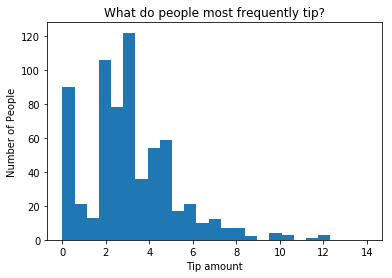

In [8]:
food['Tip'].plot.hist(bins = 25, range = (0, 14))
plt.xlabel('Tip amount')
plt.ylabel('Number of People')
plt.gca().set_title('What do people most frequently tip?')
plt.show

print(food['Tip'].median())

The most frequent tipping amounts lay in the $3 range. Additionally, we see a right skewed graph, meaning the mean is going to be higher than the median. This will be useful in interpreting future analyses that use mean as a measurement. 

In [207]:
tip = food.Tip
clean_tip = tip.dropna()
race = food.Race
payment_type = food.Payment_Type 
gender = food.Gender 
age = food.Age
# print(clean_tip)

rows_clean = list(clean_tip.keys())
total_clean = food.iloc[rows_clean]

racemean = (total_clean_2.groupby(['Race'])['Tip'].mean())
gendermean = (total_clean_2.groupby(['Gender'])['Tip'].mean())
paymean = (total_clean_2.groupby(['Payment_Type'])['Tip'].mean())

#aggregate table
total_clean_2 = total_clean[['Tip', 'Race',  'Gender', 'Payment_Type']]
#print(total_clean_2)
deviation= total_clean_2.groupby(['Race', 'Gender', 'Payment_Type'])['Tip'].std()
mean = (total_clean_2.groupby(['Race', 'Gender', 'Payment_Type'])['Tip'].mean())

In [208]:
print(racemean)

Race
A    4.269545
B    2.088857
L    4.052759
W    3.681265
Name: Tip, dtype: float64


It seems that, over all the races, Asians tend to tip the most. Whether it is because of an innate generosity or a simple love for Chinese takeout places, we may not know. However, with this insight, we know it is a safe bet for Chinese restaurants on food delivery platforms to cater towards more Asian consumers in the future. This could be contrary to original beliefs, since Americans are a larger audience group to target.

In [209]:
print(gendermean)

Gender
F    3.115959
M    3.468399
Name: Tip, dtype: float64


The tipping average between genders is more or less equal, with males tipping slightly more than females. No particular insight can be drawn from this data, as the difference in tips are too similar.

In [210]:
print(paymean)

Payment_Type
C    3.635891
R    2.926729
Name: Tip, dtype: float64


Looking at payment types, one can see a clear increase in tips through cash than through credit. This was actually surprising for us as a group, as we expected cash tips to be mis-reported by delivery personnel. This insight means that, though credit or in-app payments are a lot more convenient for orders in general, the tip can be improved if collected through cash. A potential implementation of this would be for delivery platforms to encourage cash tips when sending in orders.

In [211]:
print(mean)
print(deviation)

Race  Gender  Payment_Type
A     F       C               4.005000
              R               1.745000
      M       C               5.715000
              R               2.373333
B     F       C               2.469792
              R               1.400000
      M       C               2.055000
              R               2.128000
L     F       C               4.980000
              R               0.000000
      M       C               3.382727
              R               5.805000
W     F       C               4.051707
              R               3.368000
      M       C               4.591324
              R               3.375667
Name: Tip, dtype: float64
Race  Gender  Payment_Type
A     F       C               2.860670
              R               1.256171
      M       C               1.989816
              R               0.546016
B     F       C               4.451253
              R               1.586057
      M       C               2.309295
              R        

Finally, we can look at all the categories combined as a whole. In this aggregate table, we can gain insight as to which combinations of the three categories may generate the largest tips. From our previous insights, it should seem like Asian males who pay by cash tip the most. Looking at the table, we can see that they do have the second highest tipping average. However, surprisingly, Latino males who pay by credit win over the first place. Interesting to note, however, is that Latino Males who pay by credit also have the highest standard deviation, which could point to the fact that not many Latino males buy from this restaurant, and that their average is simply a result of outliers. This hypothesis is also backed by our previous finding of a right-skewed graph. Regardless, we now know two specific demographics that food delivery services could target to raise their tipping averages! Look out for the next ad campaigns from GrubHub and Seamless, Asians and Latino males.

### Wait Time
Another key metric of determining the success of a food delivery business is the speed at which they can get food delivered. Our data only has one metric that can be reasonably related to delivery time: distance travelled. Intuitively, the longer the distance from restaurant to destination, the longer the delivery time. However, we found something surprising in our research.

R-Squared:  0.0344408080308


<function matplotlib.pyplot.show>

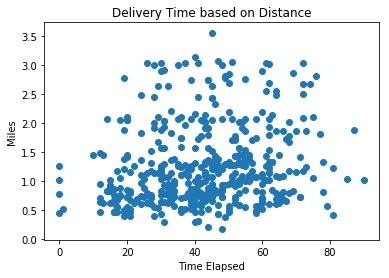

In [212]:
time_elapsed = food.Time_Elapsed
clean_time  = time_elapsed.dropna()
mean_time = time_elapsed.dropna().mean()
max_time = time_elapsed.dropna().max()
rows_time = list(clean_time.keys())
dict_time = (dict(clean_time))
values_time = list(dict_time.values())
total_time = food.iloc[rows_time]
total_miles = total_time[['Miles']]
dict_miles = (dict(total_miles))
values_miles = list(dict_miles.values())
total_time_2 = total_time[['Time_Elapsed', 'Miles']]
sorted_time = total_time_2.sort_values(['Time_Elapsed'])
# print(sorted_time)
plt.scatter(values_time, values_miles)
plt.xlabel('Time Elapsed')
plt.ylabel('Miles')
plt.gca().set_title('Delivery Time based on Distance')
slope, intercept, r_value, p_value, std_err = stats.linregress(values_time, values_miles)
print("R-Squared: ",  r_value**2)
#shows the r squared value of the scatterplot
plt.show
#plots values of time against miles 

The R-Squared value calculated means that the correlation between delivery time and miles is near 0!

Of course, one has to keep in mind that this data is gathered from Charleston, SC, and that it may not be representative of more urban cities such as NYC, where bad traffic could make distance a more significant factor. 

Just for fun, we also imported a GIS data set of Charleston to cross reference to our addresses to roughly plot where each delivery was delivered to to get a sense of density. And from this, we found a possible explanation to our conundrum regarding distance and time

In [45]:
geolocator = Nominatim(user_agent="food-delivery")
addr = food.Street_Address.unique()
food["latitude"] = 0.0
food["longitude"] = 0.0
length = len(addr)
for i in range (100):
    if(addr[i] is not None):
        location = geolocator.geocode(addr[i])
        if(location is not None):
                food["latitude"][i] = location.latitude
                food["longitude"][i] = location.longitude


C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


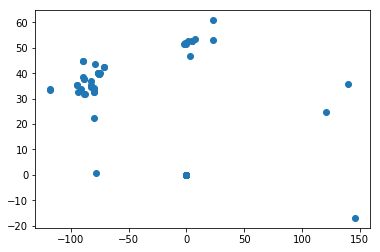

In [44]:
plt.scatter(food['longitude'], food['latitude'])

As it turns out, most of the delivery addresses are within a mile or two of the actual restaurant, which is located at (-80, 33). This may contribute to the potential lack of correlation between time and distance. After all, logically, distance should affect time greatly. Our theory is that many of the short deliveries were delayed due to some outer factor, causing the correlation between distance and time to be diluted.

This means that there is another external factor that affects delivery time way more than distance, to the point where distance's effects become negligible. With all the optimization constantly going into delivery path, delivery platforms may be looking in the wrong place. It could be more effective if platforms instead focused on enforcing restaurants to prep their meals on time, or if the hand-off between restaurant and delivery personnel were optimized.

### Return Customers
Finally, a third key factor that delivery services can keep in mind are returning customers. Let's first see what type of people tend to come back for seconds and thirds.

45 Courtenay    18
171 Ashley      15
930 Morrison    12
101 Meeting     10
25 Calhoun       8
Name: Street_Address, dtype: int64

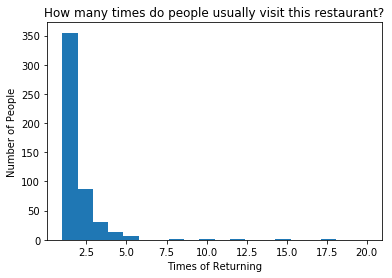

In [6]:
dupcount = food[['Street_Address','Race']].groupby('Street_Address').count().sort_values('Race',ascending=False)
series = food['Street_Address'].value_counts()



series.plot.hist(bins = 20, range = (1, 20))
plt.xlabel('Times of Returning')
plt.ylabel('Number of People')
plt.gca().set_title('How many times do people usually visit this restaurant?')
plt.show

series.head()

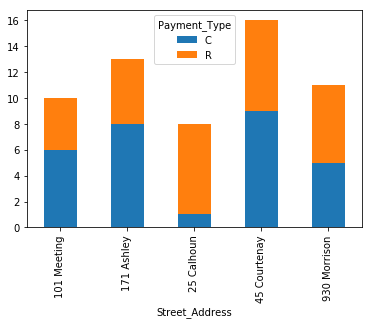

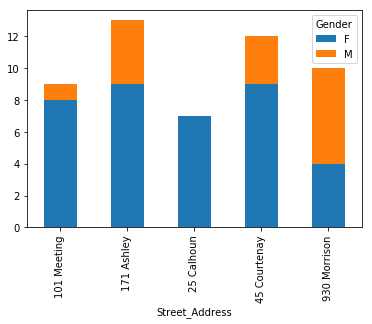

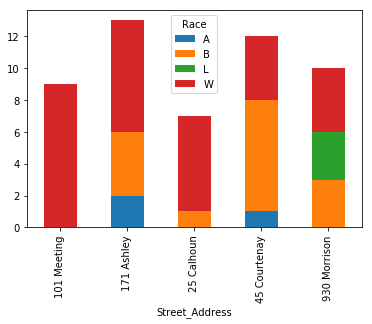

In [15]:
sameseries = food.loc[food['Street_Address'].isin(['45 Courtenay','171 Ashley','930 Morrison','101 Meeting','25 Calhoun'])]
demotest1 = sameseries.groupby(['Street_Address','Payment_Type'])['Street_Address'].count().unstack('Payment_Type').fillna(0)
demotest2 = sameseries.groupby(['Street_Address','Gender'])['Street_Address'].count().unstack('Gender').fillna(0)
demotest3 = sameseries.groupby(['Street_Address','Race'])['Street_Address'].count().unstack('Race').fillna(0)
demotest1.plot(kind='bar', stacked = True)
demotest2.plot(kind='bar', stacked = True)
demotest3.plot(kind='bar', stacked = True)

### Concluding Thoughts
So after all our research, we found a surprising amount of insight.

First, the demographic of customers affects tipping quite greatly. On average, people who identified themselves as Asian males tended to tip more. Whether it was because they tended to order more or if they were just generous, we aren't sure. However, we do know for certain that targetting the Asian male population will yield good results in terms of tipping, and potentially an increase in Average Order Size (AOS) too. By incorporating this insight, food delivery services will be able to attract a larger amount of food deliverers as well as increase revenue stream.

Second of all, demographics tend to affect return rates too. Having looked at the data and plotted stacked bar graphs, we have concluded that women who pay by credit tend to come back the most as loyal customers. To increase retention rates/reduce churn, food delivery platforms can consider making a marketing push towards credit users and appeal to a more female population.

Finally, we found an interesting lack of correlation between distance and time in our data. Though this can be chalked off to many reasons such as a biased data set (especially after looking at the geographic density of the addresses in our GIS data set), it is still a decent indication for food delivery startups to start investigating other means to reduce delivery time aside from optimizing delivery paths.